# How much do people value (avoiding) out-group harm? 

## Study 1: Hypothetical Intergroup Conflict


1. import packages and set display options

In [1]:
# import packages/libraries, set display to show plots in cell output
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.stats as ss
import pandas as pd
import pingouin as pg
import seaborn as sns
import statsmodels
import sys
from IPython.display import display

2. define custom functions for data extraction and plotting

In [2]:
# parse individual experiment data from omnibus dataframe
def get_expt_data(all_data, choice_data, expt):
    data = all_data.loc[(all_data["expt"]==expt)]
    choices = choice_data.loc[(choice_data["expt"]==expt)]
    return data, choices

# make violin plot of choice frequencies by gems/earn probability
def violin_within(choices, xlabel, fignum):
    with sns.plotting_context('paper', font_scale=1.6):
        sns.set_style("whitegrid")
        ax = sns.violinplot(data=choices, x="label", y="freqs")
        ax.figure.get_axes()[0].set_xticklabels(['0.20','0.40','0.60','0.80'])
        ax.set_ylim(0,1)
        ax.set(xlabel=xlabel, ylabel="choice frequency")
        ax.figure.tight_layout()
        ax.figure.savefig("./figs/components/Figure_" + fignum)
    return

# make joint-grid scatterplots (annotation turned off for paper output)
def make_scatter(xdata, ydata, xlabel, ylabel, fignum):
    with sns.plotting_context('paper', font_scale=1.6):
        ax = (sns.jointplot(x=xdata, 
                            y=ydata, 
                            data=data[[xdata, ydata]], 
                            kind='reg', 
                            color='k', 
                            xlim={-1,7}, 
                            ylim={-0.2,1.2})
                           .set_axis_labels(xlabel, ylabel))
        #ax = ax.annotate(ss.pearsonr, 
        #                 template="{stat} = {val:.2f}, p = {p:.3f}", 
        #                 stat=" r ")
        ax.savefig("./figs/components/Figure_" + fignum)
    return


3. import data for all studies

In [3]:
# load data for studies 1, 2, & 3
all_data = pd.read_csv("./data/outputs/all_data.csv")
all_data = pd.DataFrame(all_data)
choice_data = pd.read_csv("./data/outputs/all_choices.csv")
choice_data = pd.DataFrame(choice_data)

4. select study of interest, compute descriptive statistics

In [4]:
# restrict data to study of interest (e.g., 1)
data, choices = get_expt_data(all_data, choice_data, expt=1)
data.describe()

subjid   expt           w       idOut        idIn    chose_80  \
count  1.600000e+02  160.0  160.000000  160.000000  160.000000  160.000000   
mean   5.298503e+07    1.0    0.618889    1.485417    3.848958    0.296215   
std    3.041514e+07    0.0    0.185656    1.334301    1.731829    0.119410   
min    2.960760e+05    1.0    0.126165    0.000000    0.000000    0.130556   
25%    2.468071e+07    1.0    0.494841    0.000000    2.833333    0.229861   
50%    5.793048e+07    1.0    0.576543    1.333333    4.000000    0.272222   
75%    7.977378e+07    1.0    0.684992    2.666667    5.708333    0.319444   
max    9.973994e+07    1.0    0.985961    5.333333    6.000000    0.830556   

         chose_60    chose_40    chose_20  
count  160.000000  160.000000  160.000000  
mean     0.242240    0.238941    0.222604  
std      0.074170    0.065959    0.077237  
min      0.000000    0.052778    0.041667  
25%      0.202778    0.200000    0.180556  
50%      0.244444    0.238889    0.226389  
75%      0.283333    0.280556    0.269444  
max      0.463889    0.419444    0.458333

5. one-way repeated measures ANOVA on choice frequencies


ANOVA SUMMARY

Source      ddof1    ddof2       F    p-unc    p-GG-corr    np2    eps  sphericity      W-spher    p-spher
--------  -------  -------  ------  -------  -----------  -----  -----  ------------  ---------  ---------
label           3      477  16.326    0.000        0.000  0.093  0.691  False             0.514      0.000



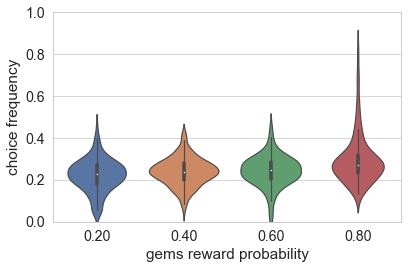

In [5]:
# one-way repeated measures ANOVA on choice frequencies by gems/earn reward probability
rma = choices.rm_anova(dv="freqs", within=["label"], subject="subjid")
pg.print_table(rma)

# make violin plot for choice frequencies
# (adjust label and figure number for study)
violin_within(choices, xlabel="gems reward probability", fignum="1A")

6. post-hoc t-tests on choice frequencies

In [6]:
# post-hoc t-tests on choice frequencies
posthocs = pg.pairwise_ttests(dv="freqs", within=["label"], subject="subjid", padjust="holm", data=choices)
pg.print_table(posthocs)


POST HOC TESTS

Contrast         A       B  Paired    Parametric        T      dof  tail         p-unc    p-corr  p-adjust         BF10    CLES    hedges
----------  ------  ------  --------  ------------  -----  -------  ---------  -------  --------  ----------  ---------  ------  --------
label       80.000  60.000  True      True          4.141  159.000  two-sided    0.000     0.000  holm          264.519   0.615     0.556
label       80.000  40.000  True      True          4.398  159.000  two-sided    0.000     0.000  holm          698.110   0.642     0.616
label       80.000  20.000  True      True          5.142  159.000  two-sided    0.000     0.000  holm        14800.000   0.687     0.747
label       60.000  40.000  True      True          0.380  159.000  two-sided    0.704     0.704  holm            0.095   0.517     0.047
label       60.000  20.000  True      True          2.191  159.000  two-sided    0.030     0.074  holm            0.901   0.575     0.259
label       40.00

7. one-sample t-test on _w_ (preference for gems/earning) against 0.5

In [7]:
# one-sample t-test on w against 0.5
wdata = data['w']
wost = pg.ttest(wdata, 0.5)
pg.print_table(wost)

    T    dof  tail         p-val  CI95%          cohen-d             BF10    power
-----  -----  ---------  -------  -----------  ---------  ---------------  -------
8.100    159  two-sided    0.000  [0.09 0.15]      0.640  49590000000.000    1.000



8. correlations between group attitudes and _w_ (preference for gems/earning)

out-group attitude X w:
pearson
r =  0.26 , p =  0.001 
spearman
r =  0.2 , p =  0.01 

in-group attitude X w:
pearson
r =  -0.12 , p =  0.132 
spearman
r =  -0.09 , p =  0.275 



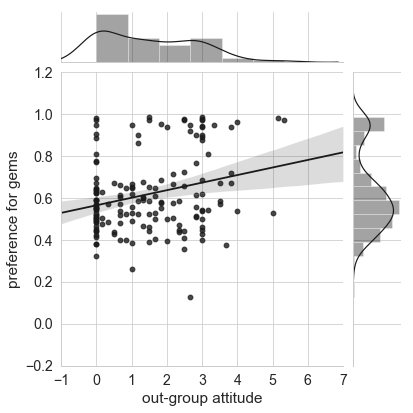

In [8]:
# correlations between group-attitudes and w (preference for gems/earning)

# out-group attitude
pwo = ss.pearsonr(data['idOut'],data['w'])
swo = ss.spearmanr(data['idOut'],data['w'])

# in-group attitude
pwi = ss.pearsonr(data['idIn'],data['w'])
swi = ss.spearmanr(data['idIn'],data['w'])
print("out-group attitude X w:\npearson\nr = ", round(pwo[0],2), ", p = ", round(pwo[1],3), "\nspearman\nr = ", round(swo[0],2), ", p = ", round(swo[1],3), "\n")
print("in-group attitude X w:\npearson\nr = ", round(pwi[0],2), ", p = ", round(pwi[1],3), "\nspearman\nr = ", round(swi[0],2), ", p = ", round(swi[1],3), "\n")

# make scatter plot for out-group attitude X w
# (adjust labels and Figure numbers for study)
make_scatter(xdata="idOut", ydata="w", xlabel="out-group attitude", ylabel="preference for gems", fignum="1B")